# Identificar fronteras no lineales

In [1]:
#from sklearn.datasets.samples_generator import make_circles, make_blobs # Version anterior
from sklearn.datasets import make_circles, make_blobs

In [2]:
X, Y = make_circles(100, factor = .1, noise = .1) 

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC

In [4]:
def plt_svc(model, ax=None, plot_support=True):
    """Plot de la función de decisión para una clasificación en 2D con SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    ##Generamos la parrila de puntos para evaluar el modelo
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(yy,xx)
    
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    
    ##Representamos las fronteras y los márgenes del SVC
    ax.contour(X,Y,P, colors="k", levels=[-1,0,1], alpha = 0.5, linestyles=["--", "-", "--"])
        
    if plot_support:
        ax.scatter(model.support_vectors_[:,0], 
                   model.support_vectors_[:,1], 
                   s=300, linewidth=1, facecolors = "blue");
    
    
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    

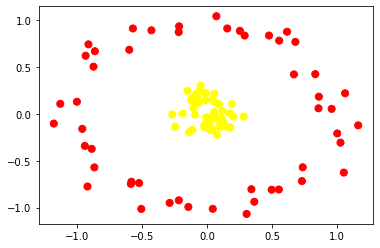

In [5]:
plt.scatter(X[:,0], X[:,1], c=Y, s=50, cmap="autumn")

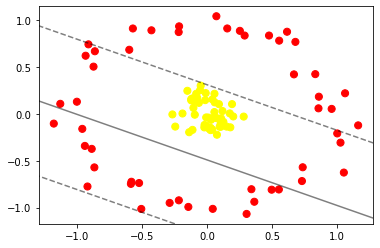

In [6]:
plt.scatter(X[:,0], X[:,1], c=Y, s=50, cmap="autumn")
plt_svc(SVC(kernel="linear").fit(X,Y), plot_support=False)

In [7]:
r = np.exp(-(X**2).sum(1))

In [8]:
r

array([0.99144414, 0.39758974, 0.38776844, 0.40631719, 0.42206311,
       0.37366344, 0.27579353, 0.46089543, 0.98473232, 0.91879995,
       0.38466426, 0.98501267, 0.39731476, 0.96480997, 0.29183461,
       0.3605002 , 0.45516757, 0.98644412, 0.30244968, 0.35117292,
       0.94910964, 0.94759998, 0.96980748, 0.93123251, 0.24609782,
       0.97793922, 0.42568846, 0.97080183, 0.44246147, 0.43596347,
       0.40625815, 0.99106957, 0.96453713, 0.42095214, 0.36396358,
       0.92291935, 0.99480241, 0.94481903, 0.98308635, 0.31285402,
       0.97788902, 0.35137344, 0.31596065, 0.37381878, 0.97753749,
       0.34759063, 0.28306942, 0.96006337, 0.96079408, 0.35761536,
       0.95087277, 0.44168703, 0.47755429, 0.97401959, 0.41665697,
       0.39401743, 0.39591191, 0.93485893, 0.30812941, 0.95959818,
       0.9778451 , 0.98192428, 0.39668604, 0.22330265, 0.5343223 ,
       0.97084128, 0.3676882 , 0.97262254, 0.946834  , 0.92505283,
       0.99637485, 0.97940993, 0.31726918, 0.46680912, 0.34047

In [9]:
from mpl_toolkits import mplot3d

In [10]:
def plot_3D(elev=30, azim=30, X=X, Y=Y, r=r):
    ax = plt.subplot(projection="3d")
    ax.scatter3D(X[:,0], X[:,1],r, c=Y, s= 50, cmap="autumn")
    ax.view_init(elev=elev, azim=azim)
    
    ax.set_xlabel("x[0]")
    ax.set_ylabel("y[1]")
    ax.set_zlabel("r")
    
    

In [11]:
from ipywidgets import interact, fixed

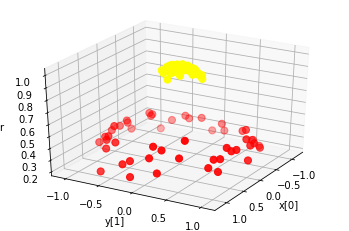

<function __main__.plot_3D(elev=30, azim=30, X=array([[ 0.08025217, -0.04639243],
       [ 0.95880385,  0.05504349],
       [-0.96034025, -0.15840933],
       [-0.58619131, -0.74632494],
       [-0.58226436, -0.72358043],
       [-0.28804533, -0.9494365 ],
       [-1.12967233,  0.10928498],
       [ 0.86035596,  0.18539615],
       [-0.10512623,  0.0658324 ],
       [-0.15161268,  0.24839577],
       [ 0.55255727, -0.80626598],
       [ 0.11851556,  0.03247827],
       [ 0.55495291,  0.78425362],
       [-0.18918502,  0.00575758],
       [ 0.30418814, -1.06725705],
       [-0.87388838,  0.5065391 ],
       [ 0.28909148,  0.83875847],
       [ 0.1075255 , -0.04568227],
       [-0.86354669,  0.6709154 ],
       [ 1.0017719 , -0.20719456],
       [ 0.1790517 , -0.1420262 ],
       [-0.08353071,  0.2164381 ],
       [ 0.17496076,  0.00681417],
       [-0.26688928, -0.0040501 ],
       [-1.17966254, -0.10209046],
       [-0.01426458,  0.14867508],
       [ 0.25249583,  0.88898445],
       [

In [12]:
interact(plot_3D, elev=[-90,-60,-30,0,30,60,90], 
         azim=[-180,-150,-120,-90,-60,-30,0,30,60,90,120,150, 180], 
         X = fixed(X), Y = fixed(Y), r = fixed(r))

In [13]:
rbf = SVC(kernel="rbf", C=1E6)
rbf.fit(X,Y)

SVC(C=1000000.0)

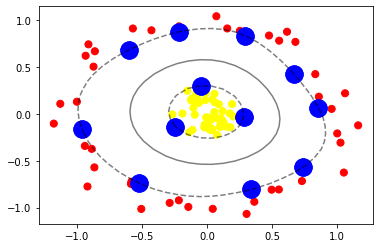

In [14]:
plt.scatter(X[:,0], X[:,1], c=Y, s=50, cmap="autumn")
plt_svc(rbf)
plt.scatter(rbf.support_vectors_[:,0], rbf.support_vectors_[:,1], s=300, lw=1, facecolors="blue")

## Ajustar los parámetros de SVM

In [15]:
X, Y = make_blobs(n_samples=100, centers = 2, random_state=0, cluster_std=1.2)

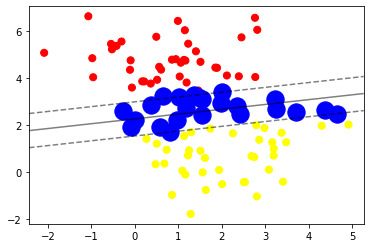

In [16]:
plt.scatter(X[:,0], X[:,1], c = Y, s=50, cmap="autumn")
model = SVC(kernel="linear", C=10)
model.fit(X,Y)
plt_svc(model)

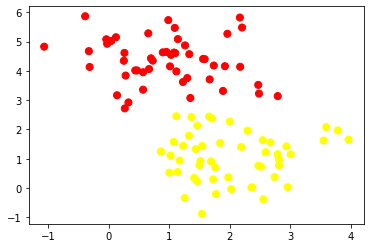

In [17]:
X, Y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=0.8)
plt.scatter(X[:,0], X[:,1], c = Y, s=50, cmap="autumn")

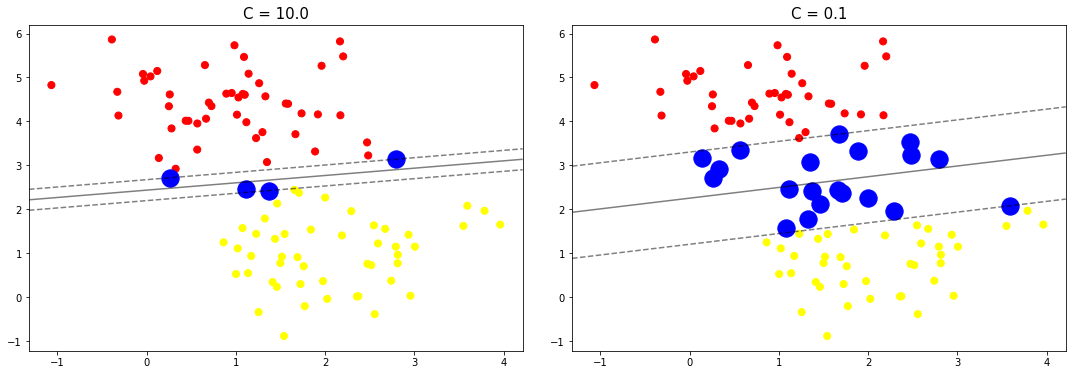

In [18]:
fig, ax = plt.subplots(1,2, figsize=(16,6))
fig.subplots_adjust(left = 0.05, right = 0.95, wspace=0.1)

for ax_i, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel="linear", C=C)
    model.fit(X,Y)
    ax_i.scatter(X[:,0],X[:,1], c = Y, s = 50, cmap="autumn")
    plt_svc(model, ax_i)
    ax_i.set_title("C = {0:.1f}".format(C), size = 15)